In [1]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from numpy.random import randint
from sklearn.ensemble import RandomForestRegressor, BaggingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import export_graphviz
from random import randint
from subprocess import call
from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)

## Load image

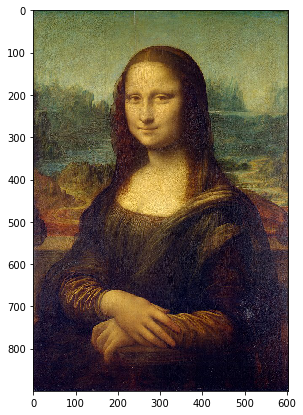

In [2]:
img = Image.open("monaLisa.jpg")
plt.figure(figsize=[7,7])
plt.imshow(img)

In [3]:
imgArr = np.array(img.getdata())
imgArr = np.reshape(imgArr, (900, 604, 3)) / 255
h, w, _ = imgArr.shape
coordinates = np.array([(tempH, tempW) for tempH in list(range(h)) for tempW in list(range(w))])

## Sampling

In [4]:
coordTrain = []
i = 0
while len(coordTrain) < 5000:
    coordTrain += [tuple(coordinates[np.random.randint(i,i+108)])]
    i += 108

In [5]:
rgbTrain = [imgArr[c[0], c[1]] for c in coordTrain]

## Decision Tree

In [6]:
regTree = RandomForestRegressor(max_depth=20, n_estimators = 10)
regTree.fit(coordTrain, rgbTrain)
predictions = np.reshape(regTree.predict(coordinates), (900,604,3))

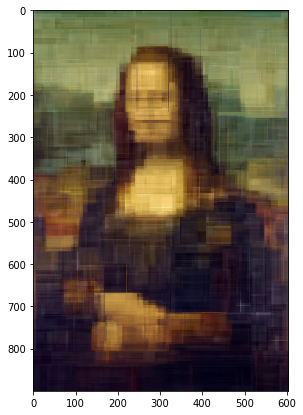

In [7]:
plt.figure(figsize=[7,7])
plt.imshow(predictions)

## Experimentation

### Single Tree, Different Depths

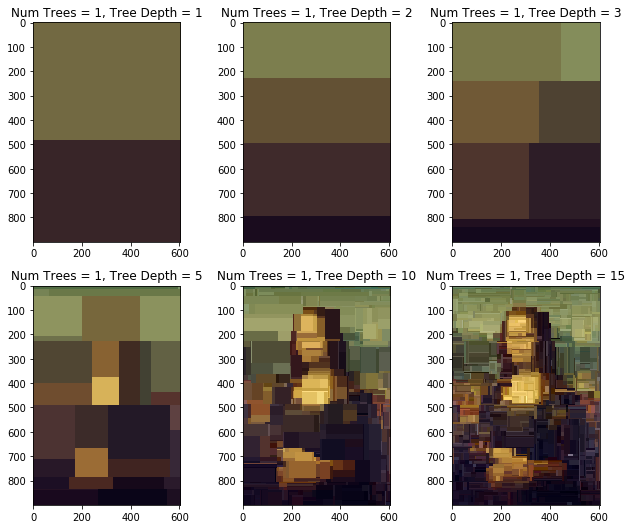

In [8]:
def sameTreeDiffDepth(depths):
    regTree = RandomForestRegressor(max_depth= depth, n_estimators = 1)
    regTree.fit(coordTrain, rgbTrain)
    return np.reshape(regTree.predict(coordinates), (900,604,3))

depths = [1, 2, 3, 5, 10, 15]

for i, depth in enumerate(depths):
    plt.subplot(2, 3, i+1)
    plt.imshow(sameTreeDiffDepth(depth))
    plt.title('Num Trees = 1, Tree Depth = {}'.format(depth))
    plt.subplots_adjust(right = 1.5, top = 1.8)

### Different Trees, Same Depth

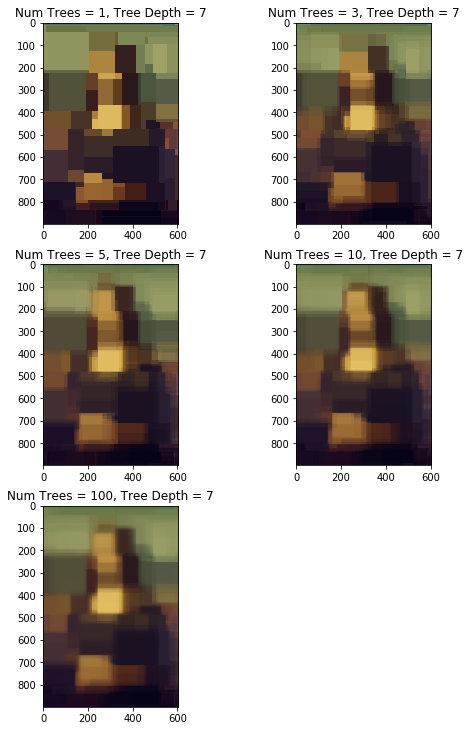

In [9]:
def outputTreeGraph(forest, numTrees):
    if numTrees == 5:
        export_graphviz(forest.estimators_[0], out_file = "tree.dot", feature_names = ["X", "Y"])
        call(['dot', "-Tpng", "tree.dot", "-o", "tree.png"])

def diffTreeSameDepth(numTrees):
    regForest = RandomForestRegressor(max_depth= 7, n_estimators = numTrees)
    regForest.fit(coordTrain, rgbTrain)
    outputTreeGraph(regForest, numTrees)
    return np.reshape(regForest.predict(coordinates), (900,604,3))
    
trees = [1, 3, 5, 10, 100]
for i, tree in enumerate(trees):
    plt.subplot(3, 2, i+1)
    plt.imshow(diffTreeSameDepth(tree))
    plt.title('Num Trees = {}, Tree Depth = 7'.format(tree))
    plt.subplots_adjust(right = 1.2, top = 2.5)

### K nearest neighbor regressions, K = 1

Text(0.5, 1.0, 'KNN Regression with K = 1')

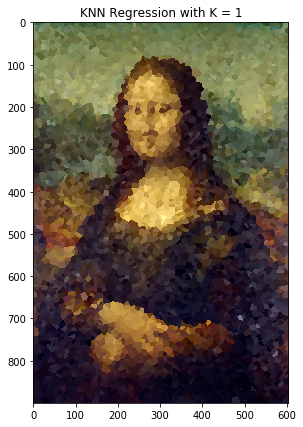

In [10]:
knn = KNeighborsRegressor(n_neighbors=1)
knn.fit(coordTrain, rgbTrain)
predicted = np.reshape(knn.predict(coordinates), (900, 604, 3))
plt.figure(figsize=[7,7])
plt.imshow(predicted)
plt.title("KNN Regression with K = 1")

## Extra Pruning Strategy
### Incresasing degree of randomness when sampling

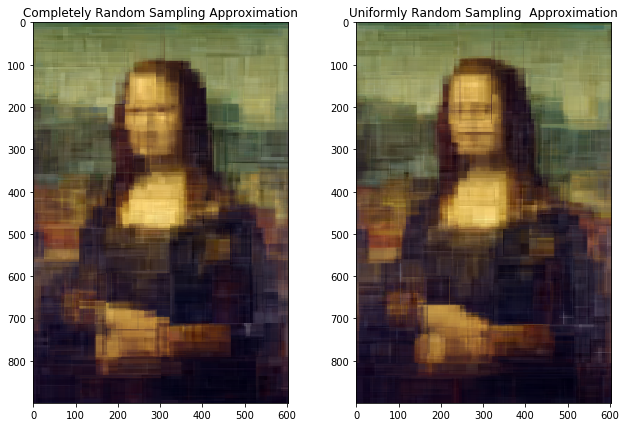

In [20]:
randH = np.random.randint(h, size=(5000))
randW = np.random.randint(w, size=(5000))

trainCoords = [(y, randW[i]) for i, y in enumerate(randH)]
rgbTrain = [imgArr[c[0], c[1]] for c in trainCoords]
forest = RandomForestRegressor()
forest.fit(trainCoords, rgbTrain)
preds = np.reshape(forest.predict(coordinates), (900,604,3))

plt.figure(figsize=[7,7])
plt.subplot(1,2,1)
plt.imshow(preds)
plt.title("Completely Random Sampling Approximation")
plt.subplot(1,2,2)
plt.subplots_adjust(right = 1.3)
plt.title("Uniformly Random Sampling  Approximation")
plt.imshow(predictions)